<h1 align="center">Experiment No. 06</h1>
<hr>

<p style="font-size:20px;"><i>$$Write\ a\ program\ to\ convolve\ two\ discrete\ time\ sequences.\ Plot\ all\ the\ sequence.\ Verify\ the\ result\ by\ analytical\ calculation.$$</i></p>
<hr>

<p style="font-size:20px">Import libraries and plot setup.</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sin,cos
from vpython import *

<IPython.core.display.Javascript object>

In [2]:
def getPlotReady(title='',xLabel='', yLabel='', figSize=None):
    fig = plt.figure()
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
        
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title,fontdict={'fontsize': 20}, pad=15.0)
    ax.set_xlabel(xLabel,fontdict={'fontsize': 16})
    ax.set_ylabel(yLabel,fontdict={'fontsize': 16})

In [4]:
def getReadySubplot(signals,title = 'Multiple Signal in subplot.', figSize=None):
    numOfPlot = len(signals)
    fig, axes = plt.subplots(numOfPlot, 1) 
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
    fig.suptitle(title, fontsize=20, y=0.93)
    for index in range(numOfPlot):
        axes[index].stem(signals[index]['x'],signals[index]['y'])
        axes[index].set_title(signals[index]['title'])
        axes[index].set_xlabel(signals[index]['xlabel'])
        axes[index].set_ylabel(signals[index]['ylabel'])

<p style="font-size:20px;">$$\begin{aligned}&Convolution\ of\ two\ signals.\end{aligned} $$</p>

In [5]:
def x(n):
    if n>=-4 and n<=2:
        return 1
    return 0

def h(n):
    if n>=-3 and n<=3:
        return 1 - n
    return 0


In [34]:
def convolve(N):
    sum = 0
    n = -4
    while n<4:
        sum += x(n) * h(N - n)
        n += 1
    return sum

In [35]:
times = np.arange(-10,10)

inputSignal = [x(n) for n in times]
impulseResponse = [h(n) for n in times]

In [36]:
times

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

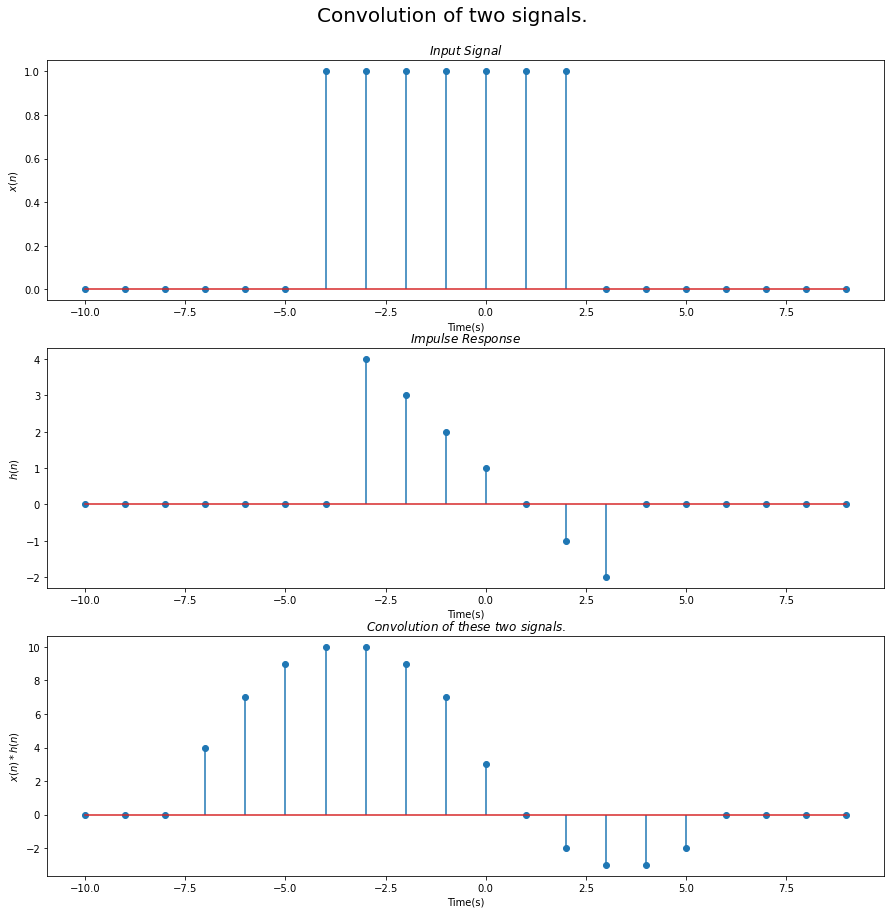

In [37]:
conv = [convolve(n) for n in times]

signals = [{'title':'$Input\ Signal$','x':times, 'y':inputSignal, 'xlabel':'Time(s)', 'ylabel':'$x(n)$'}, 
           {'title':'$Impulse\ Response$','x':times, 'y':impulseResponse, 'xlabel':'Time(s)', 'ylabel':'$h(n)$'},
           {'title':'$Convolution\ of\ these\ two\ signals.$','x':times, 'y':conv, 'xlabel':'Time(s)', 'ylabel':'$x(n) * h(n)$'}]

getReadySubplot(title='Convolution of two signals.', signals=signals, figSize=(15,15))
plt.show()